(101,)


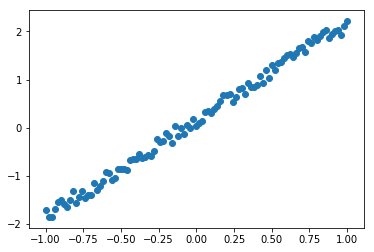

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 101)
print(x_train.shape)

y_train = 2*x_train + np.random.rand(*x_train.shape)*0.33

plt.scatter(x_train, y_train)
plt.show()

/Users/kai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


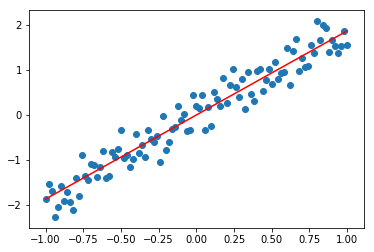

In [7]:
import tensorflow as tf

learning_rate = 0.01
epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2*x_train + np.random.randn(*x_train.shape)*0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0.0, name='weights')

y_model = model(X, w)
cost = tf.square(Y - y_model)


train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)

sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()